#### - Sobhan Moradian Daghigh
#### - 12/4/2021
#### - ML - EX02 - Q3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import random
import operator

#### Reading data

In [2]:
iris = datasets.load_iris()
dataset = pd.DataFrame(data= np.c_[iris.data, iris.target], columns= iris.feature_names + ['target'])
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


#### Normalizing

In [4]:
scaler = Normalizer().fit(dataset.iloc[:, :-1])
normalized_dataset = scaler.transform(dataset.iloc[:, :-1])
normalized_dataset = pd.DataFrame(normalized_dataset, columns=dataset.columns[:-1])
normalized_dataset['target'] = dataset.iloc[:, -1]
normalized_dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.803773,0.551609,0.220644,0.031521,0.0
1,0.828133,0.507020,0.236609,0.033801,0.0
2,0.805333,0.548312,0.222752,0.034269,0.0
3,0.800030,0.539151,0.260879,0.034784,0.0
4,0.790965,0.569495,0.221470,0.031639,0.0
...,...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699,2.0
146,0.729654,0.289545,0.579090,0.220054,2.0
147,0.716539,0.330710,0.573231,0.220474,2.0
148,0.674671,0.369981,0.587616,0.250281,2.0


#### Implementation of  cross validation spliter

In [5]:
def cross_validation(dataset, k_folds=10):
    # Shuffling the dataset
    shuffled = dataset.sample(frac=1)
    remind = shuffled.shape[0] % k_folds
    shuffled = shuffled.iloc[:-remind, :] if remind != 0 else shuffled
    return np.array_split(shuffled, k_folds)

#### As a test:

In [6]:
cross_vals = cross_validation(normalized_dataset)
cross_vals[0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
39,0.807796,0.538530,0.237587,0.031678,0.0
58,0.763019,0.335266,0.531801,0.150292,1.0
90,0.723371,0.341957,0.578697,0.157826,1.0
116,0.706105,0.325894,0.597473,0.195537,2.0
55,0.722330,0.354829,0.570260,0.164742,1.0


#### Implementation of euclidean distance

In [7]:
def euclideanDistance(vectorA, vectorB):
    distance = 0
    for i in range(len(vectorA) - 1):
        distance += np.power(np.subtract(vectorA[i], vectorB[i]), 2)
    return np.sqrt(distance)

#### Implementation of KNNClassifier

In [8]:
class kNNClassifier:
    
    def __init__(self, k_neighbors):
        self.k = k_neighbors
    
    def fit(self, train):
        self.train = train

    def getNeighbors(self, test):
        
        distances = []
        for i, trainRow in self.train.iterrows():
            distances.append([trainRow, euclideanDistance(test, trainRow), self.train.iloc[:, -1][i]])
            distances.sort(key=operator.itemgetter(1))

        neighbors = []
        for index in range(self.k):
            neighbors.append(distances[index])
        return neighbors
        
    def predict(self, test):
        
        self.test = test
        predictions = []
        
        for i, testRow in self.test.iterrows():
            neighbors = self.getNeighbors(testRow)
            output= [row[-1] for row in neighbors]
            prediction = max(set(output), key=output.count)
            predictions.append(prediction)
        
        return predictions

#### Find the optimal k_neighbors using cross validation 

Maximum accuracy: 0.980 at K = 3


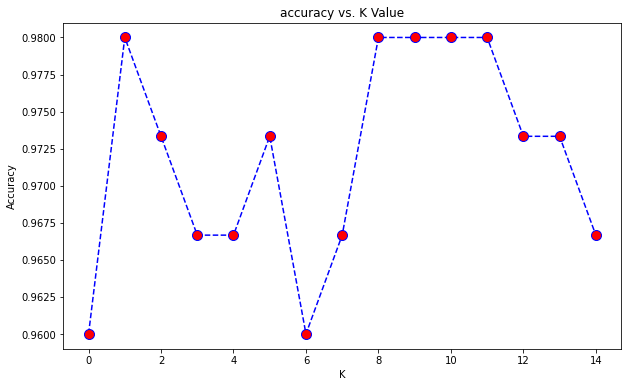

In [9]:
k_range = 30
acc = []
cross_vals = cross_validation(normalized_dataset)

for i in range(1,k_range, 2):
    accus = []
    for fold in cross_vals:
        train = normalized_dataset[~normalized_dataset.index.isin(fold.index)]
        test = fold

        knn = kNNClassifier(k_neighbors=i)
        knn.fit(train)
        predictions = knn.predict(test)
        accuracy = accuracy_score(test.iloc[:, -1], predictions)
        accus.append(accuracy)

    max_accu = np.mean(accus)
    acc.append(max_accu)
    
plt.figure(figsize=(10,6))
plt.plot(acc, color = 'blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: {:.3f} at K = {}".format(max(acc), np.multiply(acc.index(max(acc)), 2) + 1))

#### So the winner k is 11.

#### Part B:

#### Split data into 80% of train and 20% of test.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(normalized_dataset.iloc[:, :-1], normalized_dataset.iloc[:, -1], train_size=0.8, shuffle=True)

In [11]:
train = pd.DataFrame(x_train)
train['target'] = y_train
test = pd.DataFrame(x_test)
test['target'] = y_test

In [13]:
knn = kNNClassifier(k_neighbors=3)
knn.fit(train)
predictions = knn.predict(test)
accuracy = accuracy_score(test.iloc[:, -1], predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MAE = mean_absolute_error(y_test, predictions)

print('Accuracy: {:.2f}'.format(accuracy))
print('MSE: {:.2f}'.format(MSE))
print('RMSE: {:.2f}'.format(RMSE))
print('MAE: {:.2f}'.format(MAE))

Accuracy: 0.97
MSE: 0.03
RMSE: 0.18
MAE: 0.03
